<a href="https://colab.research.google.com/github/Sapna0304/Personal_Loan/blob/Sapna0304/Personal_Loan(k).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [247]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [248]:
data=pd.read_csv('/content/Bank_Personal_Loan_Modelling.csv')

In [249]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [250]:
data.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [251]:
data.shape

(5000, 14)

In [252]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [253]:
data.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [254]:
data.duplicated().sum()

0




NO missing and duplicate values!

In [255]:
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

Dropping unnecessary columns Like ID and ZIP CODE

In [256]:
data.drop(['ID','ZIP Code'], axis=1, inplace= True)

In [257]:
data.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [258]:
data.nunique()

Age                    45
Experience             47
Income                162
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

In [259]:
data.value_counts(['Personal Loan'], normalize=True)

Personal Loan
0                0.904
1                0.096
dtype: float64

In [260]:
data.value_counts(['Personal Loan'])

Personal Loan
0                4520
1                 480
dtype: int64

<Axes: xlabel='Personal Loan', ylabel='count'>

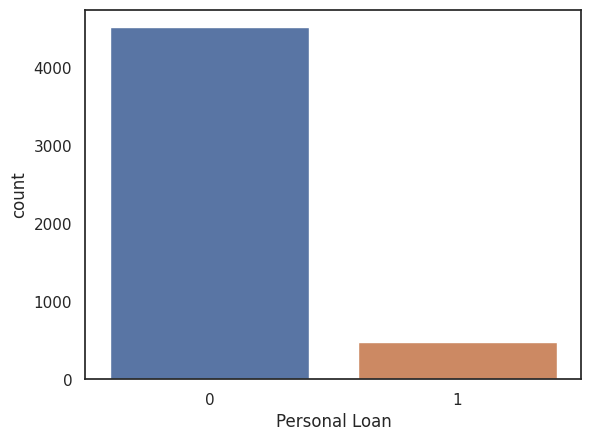

In [261]:
sns.countplot(x="Personal Loan", data=data)

Data is highly imbalanced majority of data belongs to class 0.
Imbalanced ratio is 90:10 i.e., Out of 5000 data 4520 are not opting for personal loan and 480 are opting for Personal loan!!

#### Filtering categorical and numeric columns




In [262]:
cat= ['Family','Education','Securities Account', 'CD Account','Online', 'CreditCard']
data[cat]=data[cat].astype('category')

In [263]:
cat

['Family',
 'Education',
 'Securities Account',
 'CD Account',
 'Online',
 'CreditCard']

In [264]:
num=['Age', 'Experience', 'Income','CCAvg', 'Mortgage']

In [265]:
num

['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

In [266]:
data[num].corr()

,Age,Experience,Income,CCAvg,Mortgage
Age,1.000000,0.994215,-0.055269,-0.052012,-0.012539
Experience,0.994215,1.000000,-0.046574,-0.050077,-0.010582
Income,-0.055269,-0.046574,1.000000,0.645984,0.206806
CCAvg,-0.052012,-0.050077,0.645984,1.000000,0.109905
Mortgage,-0.012539,-0.010582,0.206806,0.109905,1.000000


In [267]:
data.dtypes

Age                      int64
Experience               int64
Income                   int64
Family                category
CCAvg                  float64
Education             category
Mortgage                 int64
Personal Loan            int64
Securities Account    category
CD Account            category
Online                category
CreditCard            category
dtype: object

In [268]:
data.value_counts(['Online'])

Online
1         2984
0         2016
dtype: int64

In [269]:
data.value_counts(['Online'], normalize=True)

Online
1         0.5968
0         0.4032
dtype: float64

###EDA

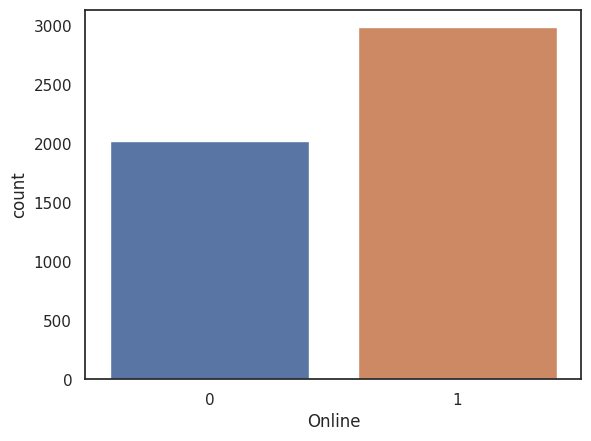

In [270]:
sns.countplot(x="Online", data=data)
plt.show()

In [271]:
def dist_box(data):
 # function plots a combined graph for univariate analysis of continous variable 
 #to check spread, central tendency , dispersion and outliers  
    Name=data.name.upper()
    fig,(ax_box,ax_dis)  =plt.subplots(nrows=2,sharex=True,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))
    mean=data.mean()
    median=data.median()
    mode=data.mode().tolist()[0]
    sns.set_theme(style="white")
    fig.suptitle("SPREAD OF DATA FOR "+ Name  , fontsize=18, fontweight='bold')
    sns.boxplot(x=data,showmeans=True, orient='h',color="violet",ax=ax_box)
    ax_box.set(xlabel='')
     # just trying to make visualisation better. This will set background to white
    sns.despine(top=True,right=True,left=True) # to remove side line from graph
    sns.distplot(data,kde=False,color='blue',ax=ax_dis)
    ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
    plt.legend({'Mean':mean,'Median':median,'Mode':mode})
    

<ipython-input-271-90114ab3434d>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data,kde=False,color='blue',ax=ax_dis)
<ipython-input-271-90114ab3434d>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data,kde=False,color='blue',ax=ax_dis)
<ipython-input-271-90114ab3434d>:15: UserWarning: 



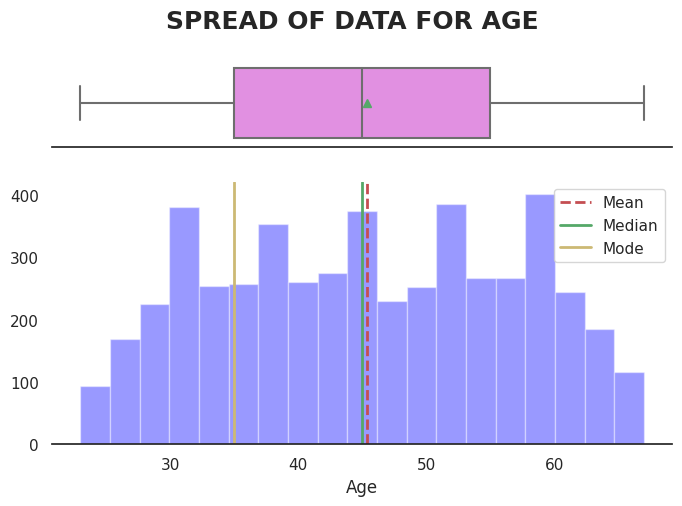

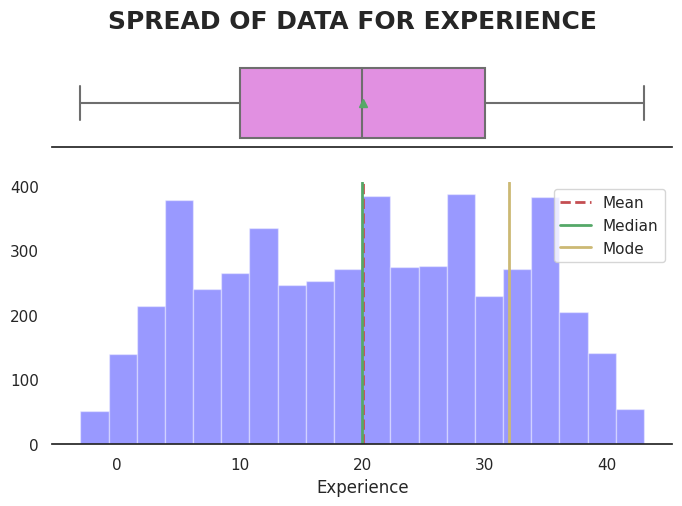

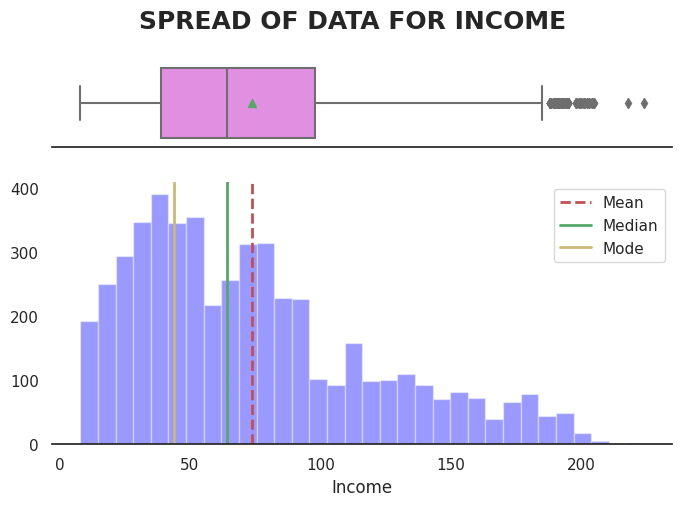

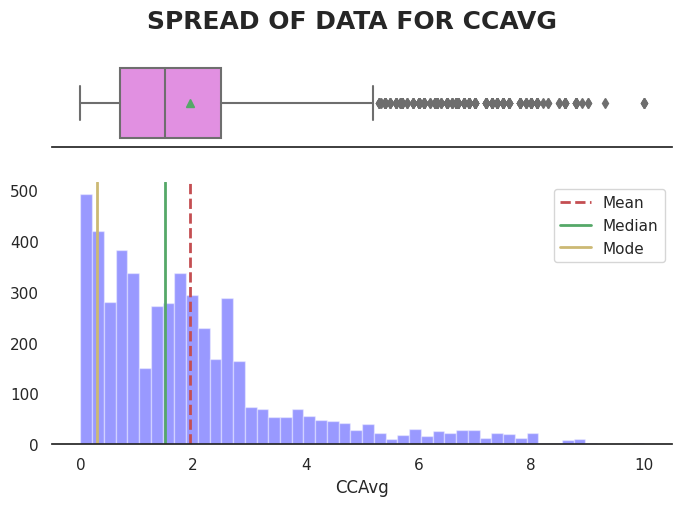

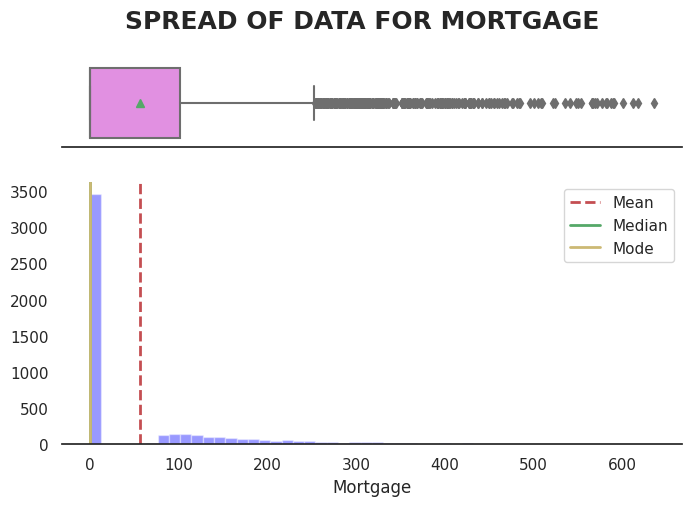

In [272]:

#select all quantitative columns for checking the spread
list_col=  ['Age','Experience','Income','CCAvg','Mortgage']
for i in range(len(list_col)):
    dist_box(data[list_col[i]])


Observations

1. Age and experience both has same distrubtion with spike at 5
2. Income is right skewed and has some outlier on higher side which can be clipped.
3. Average montly credit is right skewed and has lot of outliers on higher side which can be clipped.
4. Mortgage is mostly 0 . but is right skewed and has lot of outlier on higher side which can be clipped!

##### Outlier detection

In [273]:
data[num].describe()
Q1=data[num].quantile(0.25)
Q3=data[num].quantile(0.75)
IQR=Q3-Q1
IQR
((data[num]<(Q1-1.5*IQR)) | (data[num]>(Q3+1.5*IQR))).any()

Age           False
Experience    False
Income         True
CCAvg          True
Mortgage       True
dtype: bool

Income, CCAvg and Mortgage have outliers!

In [274]:
q1=data['Income'].quantile(0.25)
q3=data['Income'].quantile(0.70)
iqr = q3-q1
filter1 = (data['Income']>=q1 - 1.5*iqr) & (data['Income']<=q3+1.5*iqr)
data=data.loc[filter1]

q1=data['CCAvg'].quantile(0.25)
q3=data['CCAvg'].quantile(0.70)
iqr = q3-q1
filter1 = (data['CCAvg']>=q1 - 1.5*iqr) & (data['CCAvg']<=q3+1.5*iqr)
data=data.loc[filter1]

q1=data['Mortgage'].quantile(0.25)
q3=data['Mortgage'].quantile(0.70)
iqr = q3-q1
filter1 = (data['Mortgage']>=q1 - 1.5*iqr) & (data['Mortgage']<=q3+1.5*iqr)
data=data.loc[filter1]

<Axes: >

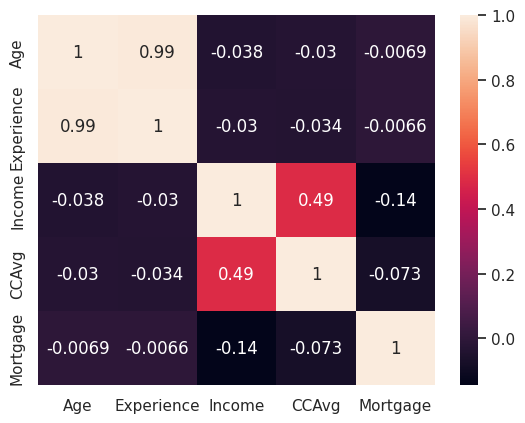

In [275]:
sns.heatmap(data[num].corr(),annot=True)

As we can see Age and experience are highly correlated!

#### Data Prep

In [276]:
from sklearn.model_selection import train_test_split
X=data.drop(['Personal Loan'],axis=1)
y=data['Personal Loan']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3209, 11)
(803, 11)
(3209,)
(803,)


In [277]:
from sklearn.preprocessing import StandardScaler
SC= StandardScaler()
X_train = SC.fit_transform(X_train)
X_test =SC.transform(X_test)

### Encoding

In [278]:
pd.get_dummies(data=data, columns=['Family','Education','Securities Account', 'CD Account','Online', 'CreditCard'])

,Age,Experience,Income,CCAvg,Mortgage,Personal Loan,Family_1,Family_2,Family_3,Family_4,...,Education_2,Education_3,Securities Account_0,Securities Account_1,CD Account_0,CD Account_1,Online_0,Online_1,CreditCard_0,CreditCard_1
0,25,1,49,1.6,0,0,0,0,0,1,...,0,0,0,1,1,0,1,0,1,0
1,45,19,34,1.5,0,0,0,0,1,0,...,0,0,0,1,1,0,1,0,1,0
2,39,15,11,1.0,0,0,1,0,0,0,...,0,0,1,0,1,0,1,0,1,0
3,35,9,100,2.7,0,0,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0
4,35,8,45,1.0,0,0,0,0,0,1,...,1,0,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1.9,0,0,1,0,0,0,...,0,1,1,0,1,0,0,1,1,0
4996,30,4,15,0.4,85,0,0,0,0,1,...,0,0,1,0,1,0,0,1,1,0
4997,63,39,24,0.3,0,0,0,1,0,0,...,0,1,1,0,1,0,1,0,1,0
4998,65,40,49,0.5,0,0,0,0,1,0,...,1,0,1,0,1,0,0,1,1,0


In [279]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import recall_score, classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_curve , auc , f1_score


In [280]:
RF=RandomForestClassifier()
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
y_trains=RF.predict(X_train) 


print(accuracy_score(y_train, y_trains)*100)
print(accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(classification_report(y_train, y_trains))

100.0
98.25653798256539
[[759   1]
 [ 13  30]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       760
           1       0.97      0.70      0.81        43

    accuracy                           0.98       803
   macro avg       0.98      0.85      0.90       803
weighted avg       0.98      0.98      0.98       803

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3079
           1       1.00      1.00      1.00       130

    accuracy                           1.00      3209
   macro avg       1.00      1.00      1.00      3209
weighted avg       1.00      1.00      1.00      3209



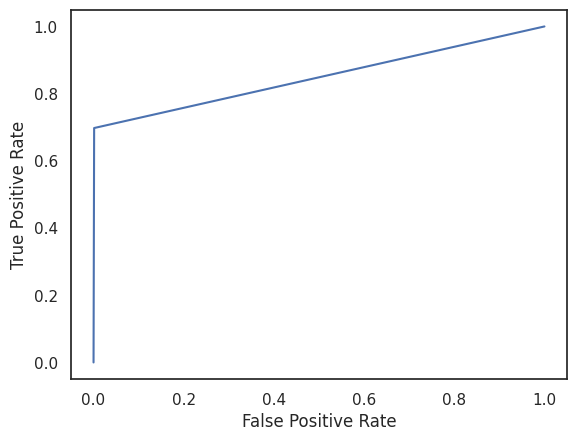

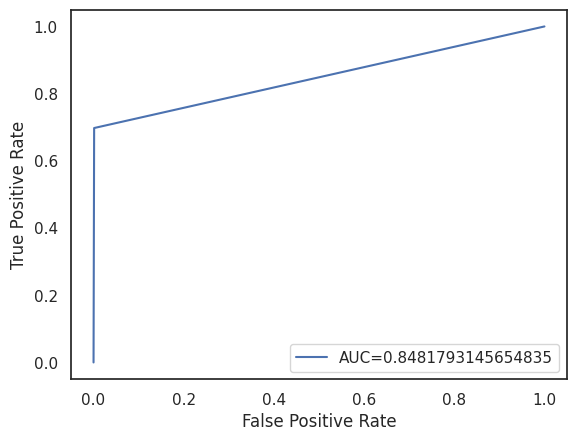

In [281]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
auc = metrics.roc_auc_score(y_test, y_pred)
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

Feature Importances

In [282]:
importances = RF.feature_importances_
#Sort the feature importance in descending order
sorted_indices = np.argsort(importances)[::-1]
feat_labels = data.columns[1:]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

 1) Family                         0.346178
 2) Education                      0.198618
 3) Mortgage                       0.136648
 4) CCAvg                          0.086367
 5) Experience                     0.073632
 6) Income                         0.071868
 7) CD Account                     0.032304
 8) Personal Loan                  0.017016
 9) Online                         0.015012
10) CreditCard                     0.014603
11) Securities Account             0.007756


Logistic Model

In [283]:
logistic_model=LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
y_trains=logistic_model.predict(X_train) 

print(accuracy_score(y_train, y_trains)*100)
print(accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(classification_report(y_train, y_trains))

97.19538797133063
96.38854296388543
[[754   6]
 [ 23  20]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       760
           1       0.77      0.47      0.58        43

    accuracy                           0.96       803
   macro avg       0.87      0.73      0.78       803
weighted avg       0.96      0.96      0.96       803

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3079
           1       0.76      0.45      0.56       130

    accuracy                           0.97      3209
   macro avg       0.87      0.72      0.77      3209
weighted avg       0.97      0.97      0.97      3209



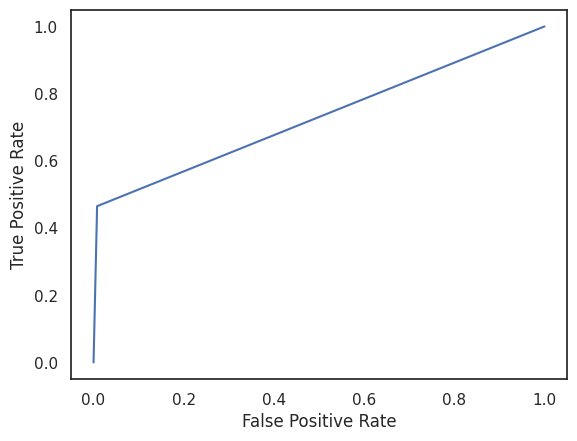

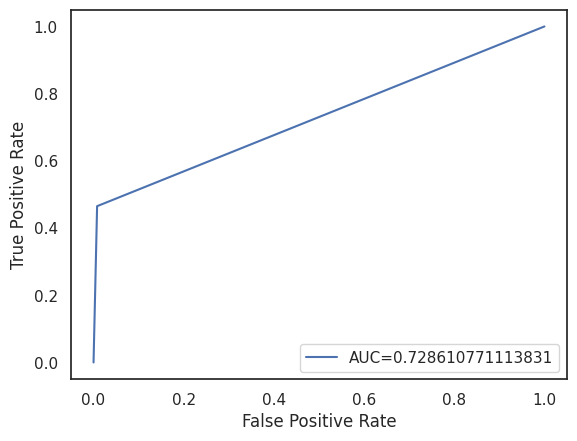

In [284]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
auc = metrics.roc_auc_score(y_test, y_pred)
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

SVC MODEL

In [285]:
svc=SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(svc.score(X_train,y_train)*100)
print(accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(classification_report(y_train, y_trains))

98.16142100342786
96.38854296388543
[[759   1]
 [ 28  15]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       760
           1       0.94      0.35      0.51        43

    accuracy                           0.96       803
   macro avg       0.95      0.67      0.74       803
weighted avg       0.96      0.96      0.96       803

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3079
           1       0.76      0.45      0.56       130

    accuracy                           0.97      3209
   macro avg       0.87      0.72      0.77      3209
weighted avg       0.97      0.97      0.97      3209



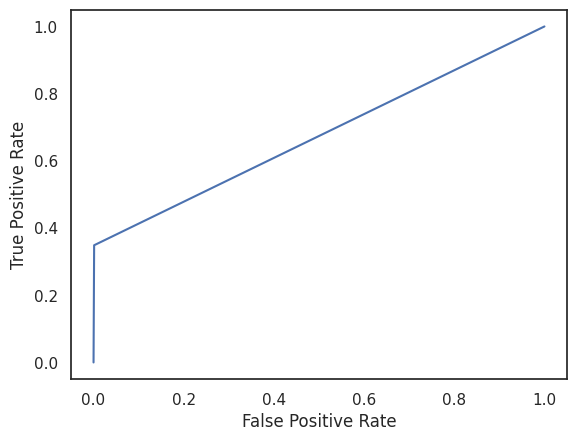

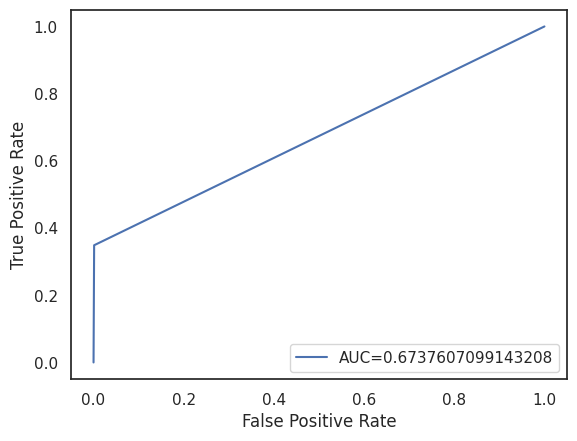

In [286]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
auc = metrics.roc_auc_score(y_test, y_pred)
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# CONCLUSION

From all the models that i have built Random Forest performs the best AUC i.e., 0.848